<a href="https://colab.research.google.com/github/shahtvisha/ImageProcessing/blob/main/IP_ObjectDetectionUsingMultipleTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing Libraries

In [ ]:
pip install opencv-python

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

**Technique 1**
* Convert imported image to grayscale
* Binary Thresholding
* Identifying contours

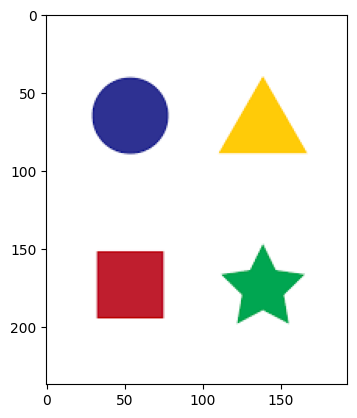

In [ ]:
original_img = cv2.imread('/content/simpleimage.png')
image1 = cv2.cvtColor(original_img,cv2.COLOR_BGR2RGB)
plt.imshow(image1)
plt.show()
image= image1.copy()

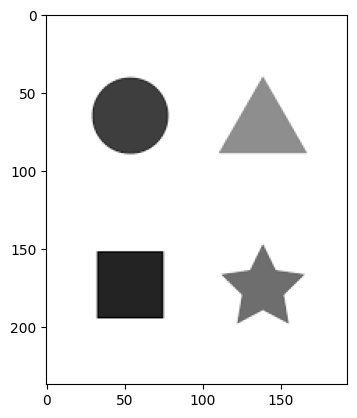

In [ ]:
gray_image = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()

In [ ]:
_, binary_normal = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

Text(0.5, 1.0, 'Normal Thresholding')

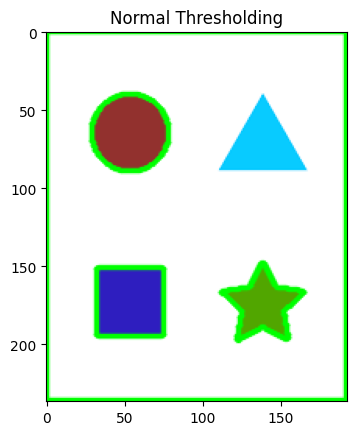

In [ ]:
# Find contours in the binary image
contours_normal, hierarchy_normal = cv2.findContours(binary_normal, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the image for drawing contours
image_copy_normal = image1.copy()

# Draw contours on the image
cv2.drawContours(image_copy_normal, contours_normal, -1, (0, 255, 0), 2, cv2.LINE_AA)

# Display the image with contours using normal thresholding
plt.imshow(cv2.cvtColor(image_copy_normal, cv2.COLOR_BGR2RGB))
plt.title("Normal Thresholding")

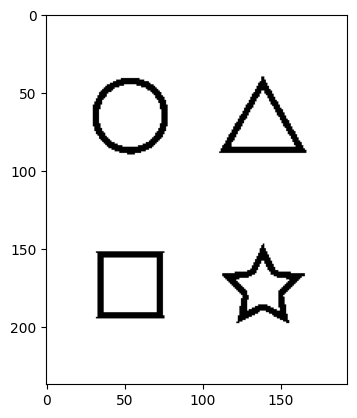

In [ ]:
binary = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(binary, cmap='gray')
plt.show()

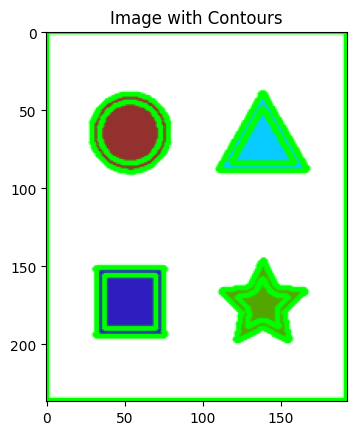

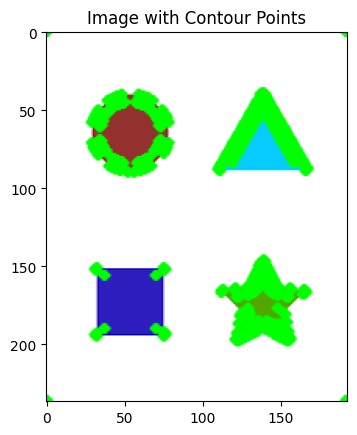

In [ ]:
# Find contours
contours2, hierarchy2 = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the image for drawing contours
image_copy2 = image1.copy()

# Draw contours on the image
cv2.drawContours(image_copy2, contours2, -1, (0, 255, 0), 2, cv2.LINE_AA)

# Display the image with contours
plt.imshow(cv2.cvtColor(image_copy2, cv2.COLOR_BGR2RGB))
plt.title("Image with Contours")
plt.show()

# Create another copy of the image for drawing contour points
image_copy3 = image1.copy()

# Loop through contours and draw points
for i, contour in enumerate(contours2):
    for j, contour_point in enumerate(contour):
        # Draw a circle at each contour point
        cv2.circle(image_copy3, (contour_point[0][0], contour_point[0][1]), 2, (0, 255, 0), 2, cv2.LINE_AA)

# Display the image with contour points
plt.imshow(cv2.cvtColor(image_copy3, cv2.COLOR_BGR2RGB))
plt.title("Image with Contour Points")
plt.show()



**Technique 2**
* Step 1. Edge Detection

Apply edge detection algorithms (e.g., Canny, Sobel, or Prewitt) to identify object boundaries.

* Step 2: Contour Detection

Find contours in the edge-detected image.
Calculate contour properties like area, perimeter, and centroid.

* Step 3: Color Analysis

Incorporate color analysis techniques to distinguish objects based on color information.

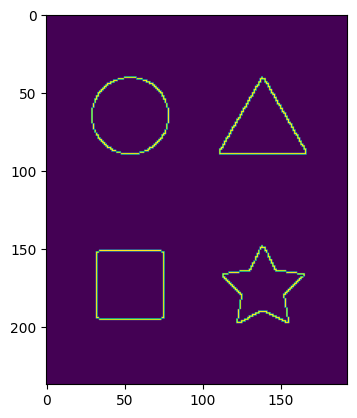

In [ ]:
canny = cv2.Canny(gray_image, 30, 150, 3)
plt.imshow(canny)
plt.show()

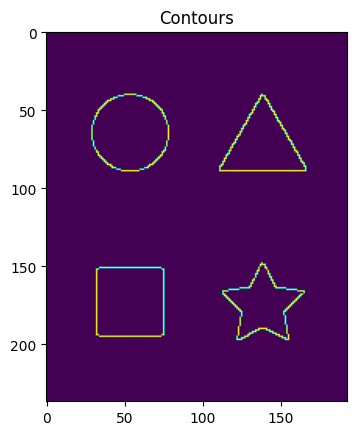

In [ ]:
contours, hierarchies = cv2.findContours(canny, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

blank = np.zeros(binary_normal.shape[:2],dtype='uint8')

cv2.drawContours(blank, contours, -1,
                (255, 0, 0), 1)

plt.imshow(blank)
plt.title("Contours")
plt.show()


x: 53 y: 173
x: 53 y: 173
x: 138 y: 175
x: 138 y: 175
x: 138 y: 72
x: 53 y: 64
x: 138 y: 72
x: 53 y: 64


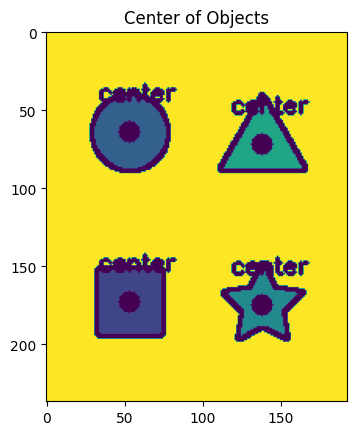

In [ ]:
imaget2= gray_image.copy()
for i in contours:
    M = cv2.moments(i)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        cv2.drawContours(imaget2, [i], -1, (0, 255, 0), 2)
        cv2.circle(imaget2, (cx, cy), 7, (0, 0, 255), -1)
        cv2.putText(imaget2, "center", (cx - 20, cy - 20),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
    print(f"x: {cx} y: {cy}")

plt.imshow(imaget2)
plt.title("Center of Objects")
plt.show()


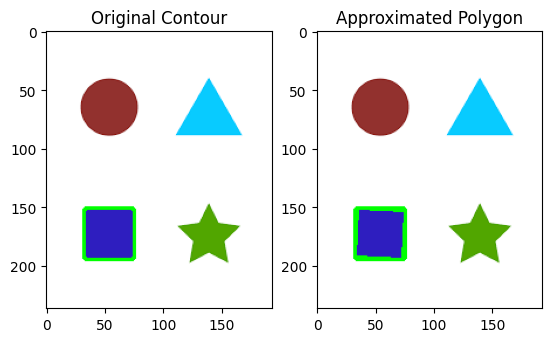

In [ ]:
imaget3= image.copy()
cnt = contours[0]
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)
epsilon = 0.1*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

# Visualize the original contour and the approximated polygon
plt.subplot(121)
cv2.drawContours(imaget3, [cnt], 0, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(imaget3, cv2.COLOR_BGR2RGB))
plt.title("Original Contour")

plt.subplot(122)
cv2.drawContours(imaget3, [approx], 0, (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(imaget3, cv2.COLOR_BGR2RGB))
plt.title("Approximated Polygon")

plt.show()


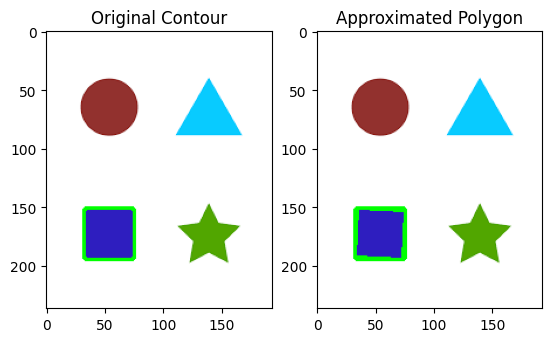

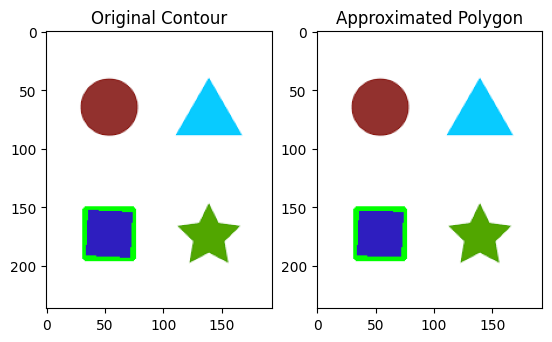

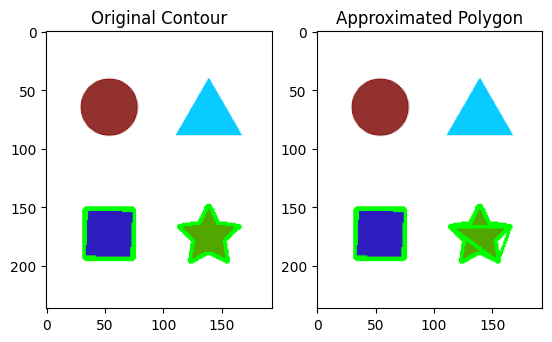

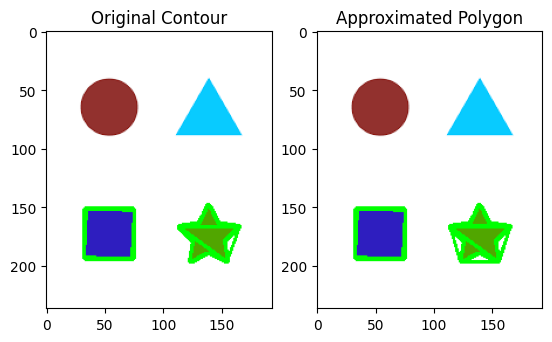

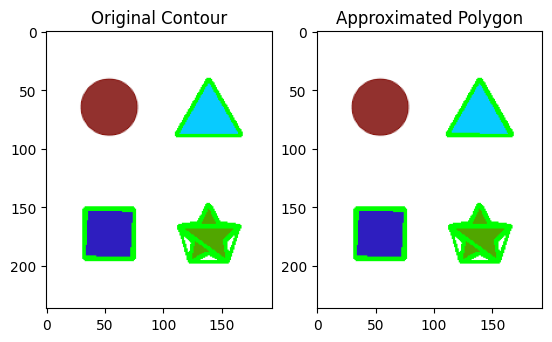

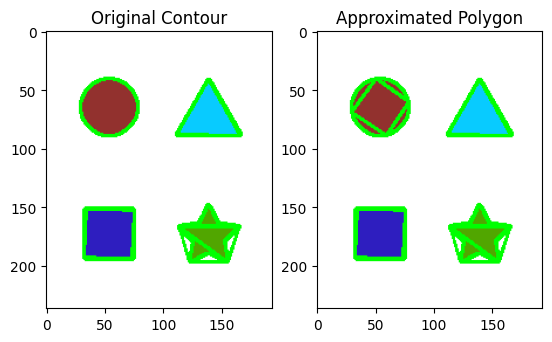

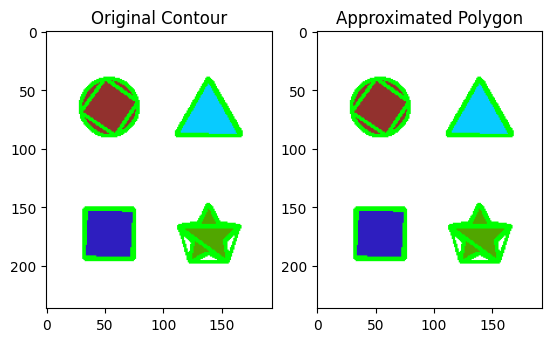

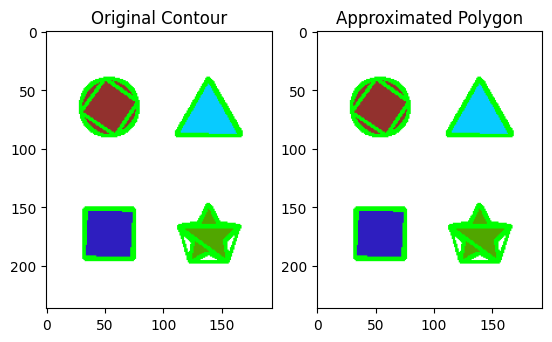

In [ ]:
imaget3= image.copy()
for cnt in contours:
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    epsilon = 0.1 * perimeter
    approx = cv2.approxPolyDP(cnt, epsilon, True)

    # Visualize the original contour and the approximated polygon
    plt.subplot(121)
    cv2.drawContours(imaget3, [cnt], 0, (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(imaget3, cv2.COLOR_BGR2RGB))
    plt.title("Original Contour")

    plt.subplot(122)
    cv2.drawContours(imaget3, [approx], 0, (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(imaget3, cv2.COLOR_BGR2RGB))
    plt.title("Approximated Polygon")

    plt.show()

Enter H min value (0-179): 55
Enter H max value (0-179): 70
Enter S min value (0-255): 90
Enter S max value (0-255): 200
Enter V min value (0-255): 225
Enter V max value (0-255): 255
Object detected


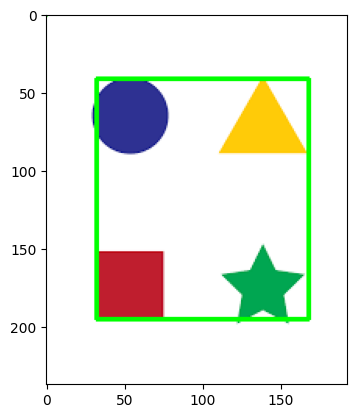

In [ ]:
image4= image.copy()
hsv_image = cv2.cvtColor(image4, cv2.COLOR_BGR2HSV)

h_min = int(input("Enter H min value (0-179): "))
h_max = int(input("Enter H max value (0-179): "))
s_min = int(input("Enter S min value (0-255): "))
s_max = int(input("Enter S max value (0-255): "))
v_min = int(input("Enter V min value (0-255): "))
v_max = int(input("Enter V max value (0-255): "))
# lower and upper limits entered by the user
lower_limit = np.array([h_min, s_min, v_min])
upper_limit = np.array([h_max, s_max, v_max])

# create a mask for the specified color range
mask = cv2.inRange(hsv_image, lower_limit, upper_limit)
# get the bounding box from the mask image
bbox = cv2.boundingRect(mask)

# if we get a bounding box, use it to draw a rectangle on the image
if bbox is not None:
    print("Object detected")
    x, y, w, h = bbox
    cv2.rectangle(image1, (x, y), (x + w, y + h), (0, 255, 0), 2)
else:
    print("Object not detected")

plt.imshow(image1)
plt.show()

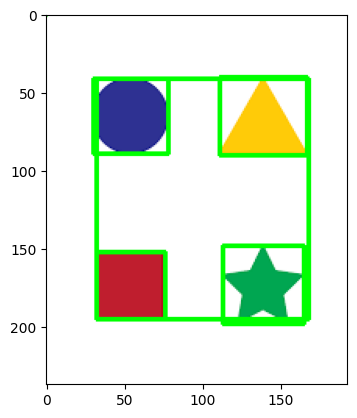

In [ ]:
colors = {
    'blue': [(90, 50, 50), (130, 255, 255)],
    'yellow': [(20, 100, 100), (40, 255, 255)],
    'red': [(0, 100, 100), (10, 255, 255)],
    'green': [(35, 100, 100), (85, 255, 255)]
}

# Create an empty mask
combined_mask = np.zeros(hsv_image.shape[:2], dtype=np.uint8)

# Create masks for each color and combine them
for color_name, (lower_limit, upper_limit) in colors.items():
    mask = cv2.inRange(hsv_image, np.array(lower_limit), np.array(upper_limit))
    combined_mask = cv2.bitwise_or(combined_mask, mask)

# Find contours in the combined mask
contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the image for drawing bounding boxes
image_copy = image1.copy()

# Loop through the detected contours and draw bounding boxes
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(image_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with bounding boxes
plt.imshow(image_copy)
plt.show()


**Technique 3**
*   Step 1: Apply Gaussian Blur
*   Step 2: Dilate the image
*   Step 3: Find the contour





In [ ]:
blur = cv2.GaussianBlur(gray_image, (11, 11), 0)
canny = cv2.Canny(blur, 30, 150, 3)

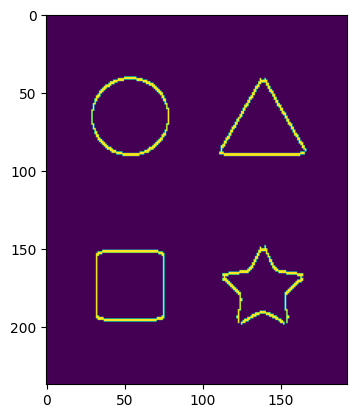

In [ ]:
dilated = cv2.dilate(canny, (1, 1), iterations=1)
plt.imshow(dilated)
plt.show()


objects in the image :  5


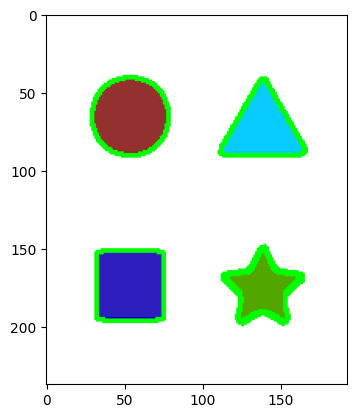

In [ ]:
(cnt, hierarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
plt.imshow(rgb)
